<div>
<img src="https://res-5.cloudinary.com/crunchbase-production/image/upload/c_lpad,h_256,w_256,f_auto,q_auto:eco/v1455514364/pim02bzqvgz0hibsra41.png" align="right"><br><br><FONT FACE="times new roman" SIZE=5>
<b></b>
<br>
<i><b>Docente:</b></i> Cesar Cristancho.
<br>
<i><b>Asignatura:</b></i> Inteligencia Artificial
<br>
<i><b>Estudiante:</b></i> Esteban Rodriguez - Santiago Niño
<br>
<i><b>Tema:</b></i> Parcial #3 -Modelos de clasificación
<br>
24/11/2022
<br>
</FONT>
</div>

#INDICACIONES

En este colab se reunen todas las herramientas necesarias para la preparación de datos, entrenamiento y verificación de los diferentes modelos de ML.
Deben realizar todo el procedimiento aqui indicado para un problema en concreto.

La actividad será recibida hasta la hora señalada en nuestra aula Teams.


Deben evaluar mínimo tres modelos de los aquí citados.


La actividad debe ser realizada en grupos de máximo tres personas.

Asegúrense de otorgar los permisos correspondientes para acceder a su colab y evaluarlo.


Tienen a su disposición las presentaciones de los temas y los colabs subidos a nuestra aula en Teams, la bibliografia y cualquier otro recurso disponible.

Elijan de los datasets disponibles en: https://scikit-learn.org/stable/datasets/toy_dataset.html. Se descarta el dataset de Iris dado que con este se realiza el ejemplo. Pueden usar estos u otro disponible de algun problema de clasificación.

NOTA: ASEGURENSE DE ELEGIR DATASETS DIFERENTES EN CADA GRUPO. DOS GRUPOS CON EL MISMO DATASET PUEDEN PERJUDICAR SU CALIFICACION.







Importe los recursos necesarios

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine  # linea para importacion de dataset.

#COMPRENSION DE PROBLEMA A TRATAR:

De acuerdo con el dataset elegido y la información disponible, formule una interpretación del problema a tratar. Especifique también:

Los datos son los resultados de un análisis químico de vinos cultivados en la misma región de Italia por tres cultivadores diferentes. Se toman trece medidas diferentes para los diferentes componentes que se encuentran en los tres tipos de vino. Se requiere estimar mediante modelos de Machine Learning a que calidad pertenece cada uno dependiendo de su clase.

Atributos:


*   Alcohol
*   Malic acid
*   Ash
*   Alcalinity of ash
*   Magnesium
*   Total phenols
*   Flavanoids
*   Nonflavanoid phenols
*   Proanthocyanins
*   Color intensity
*   Hue
*   OD280/OD315 of diluted wines
*   Proline

Etiqueta: Class (0,1,2)

Tipo de datos: Todos las valores son numéricos, los atributos tipo float y la etiqueta int para determinar a que clase pertenece.


Inicie explorando los datos disponibles.

In [ ]:
wine = load_wine()
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [ ]:
wine.data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [ ]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [ ]:
wine_pd = pd.DataFrame(wine.data, columns=wine.feature_names)
wine_pd["Class"] = wine.target
wine_pd.head()

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  Class  
0                          3.92   1065.0      0  
1                          3.40   1050.0      0  
2                          3.17   1185.0      0  
3                          3.45   1480.0      0  
4                          2.93    735.0      0

In [ ]:
wine_pd.shape

(178, 14)

In [ ]:
wine_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  Class

In [ ]:
wine_pd = pd.DataFrame(wine.data, columns=wine.feature_names)
wine_pd["Class"] = wine.target

#iris_pd.loc[iris_pd['Class'] == 0, 'Class'] = 'Setosa'
#iris_pd.loc[iris_pd['Class'] == 1, 'Class'] = 'Versicolour'
#iris_pd.loc[iris_pd['Class'] == 2, 'Class'] = 'Virginica'
#iris_pd.head()

In [ ]:
wine_pd["Class"].value_counts()

1    71
0    59
2    48
Name: Class, dtype: int64

Realice los histogramas para ver la distribución de los datos

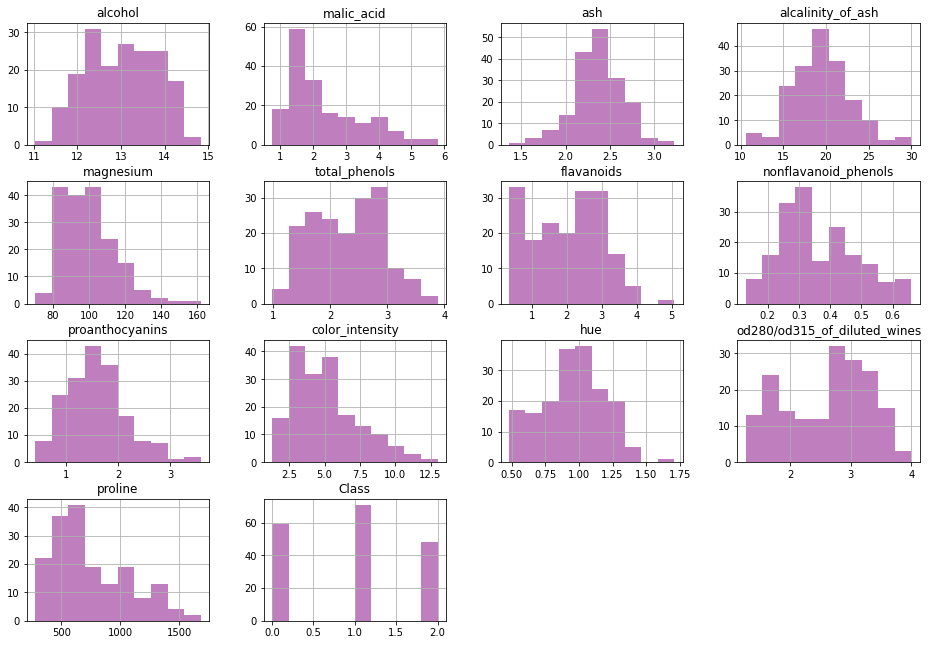

In [ ]:
wine_pd.hist(figsize=(16,11), color='purple', alpha=0.5)
plt.show()


DIAGRAMA DE CAJAS: Uselo para identificar datos alejados de la distribucion que podrian afectar el modelo.


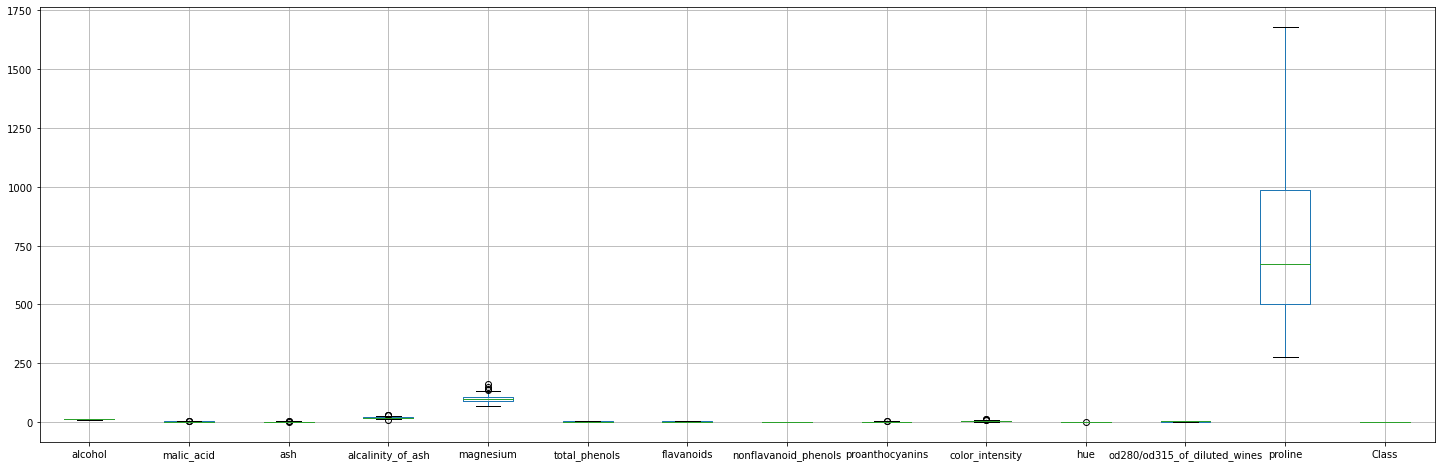

In [ ]:
wine_pd.boxplot(figsize=(25,8))
plt.show()

Según el diagrama de cajas, los valores del atributo Proline, podrían afectar al modelo, debido a que la distribución de sus valores, no se encuentran en la mayoría de valores de los demás atributos.

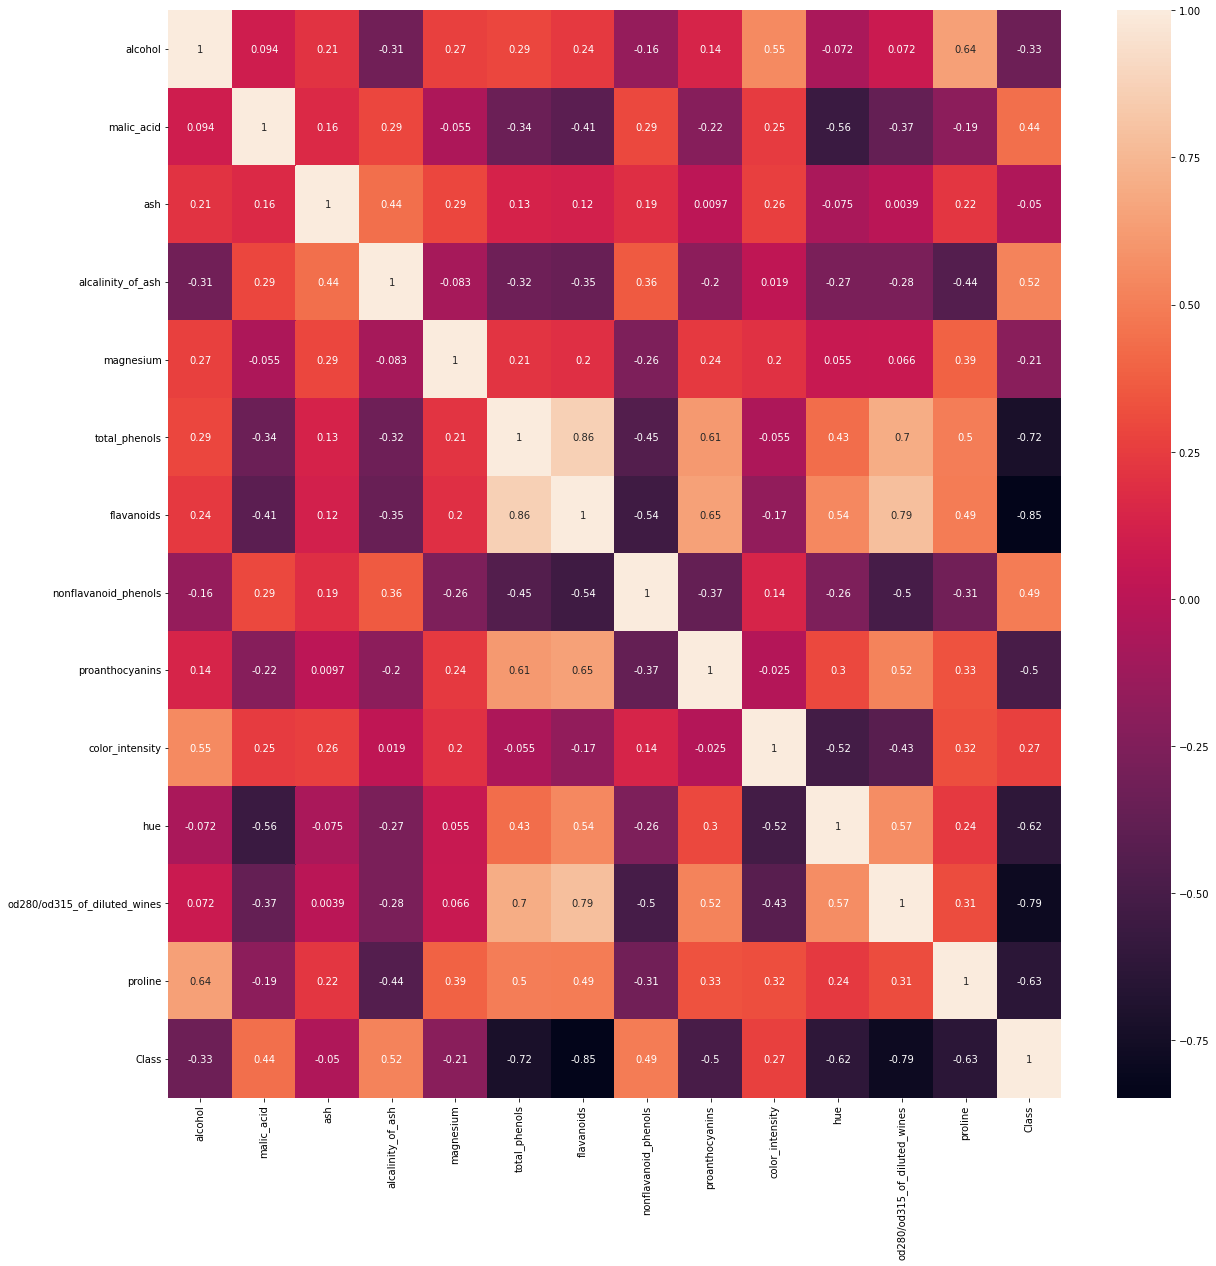

In [ ]:
corr = wine_pd.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True)

In [ ]:
wine_pd.corr().Class.to_frame()

Class
alcohol                      -0.328222
malic_acid                    0.437776
ash                          -0.049643
alcalinity_of_ash             0.517859
magnesium                    -0.209179
total_phenols                -0.719163
flavanoids                   -0.847498
nonflavanoid_phenols          0.489109
proanthocyanins              -0.499130
color_intensity               0.265668
hue                          -0.617369
od280/od315_of_diluted_wines -0.788230
proline                      -0.633717
Class                         1.000000

Gracias a la matriz de correlación realizada, se deduce que los atributos que más influyen en la clase del vino son: malic_acid, alcalinity_of_ash, nonflavanoid_phenols y color_intensity

Elabore los gráficos de correlación de los atributos o características con la etiqueta.

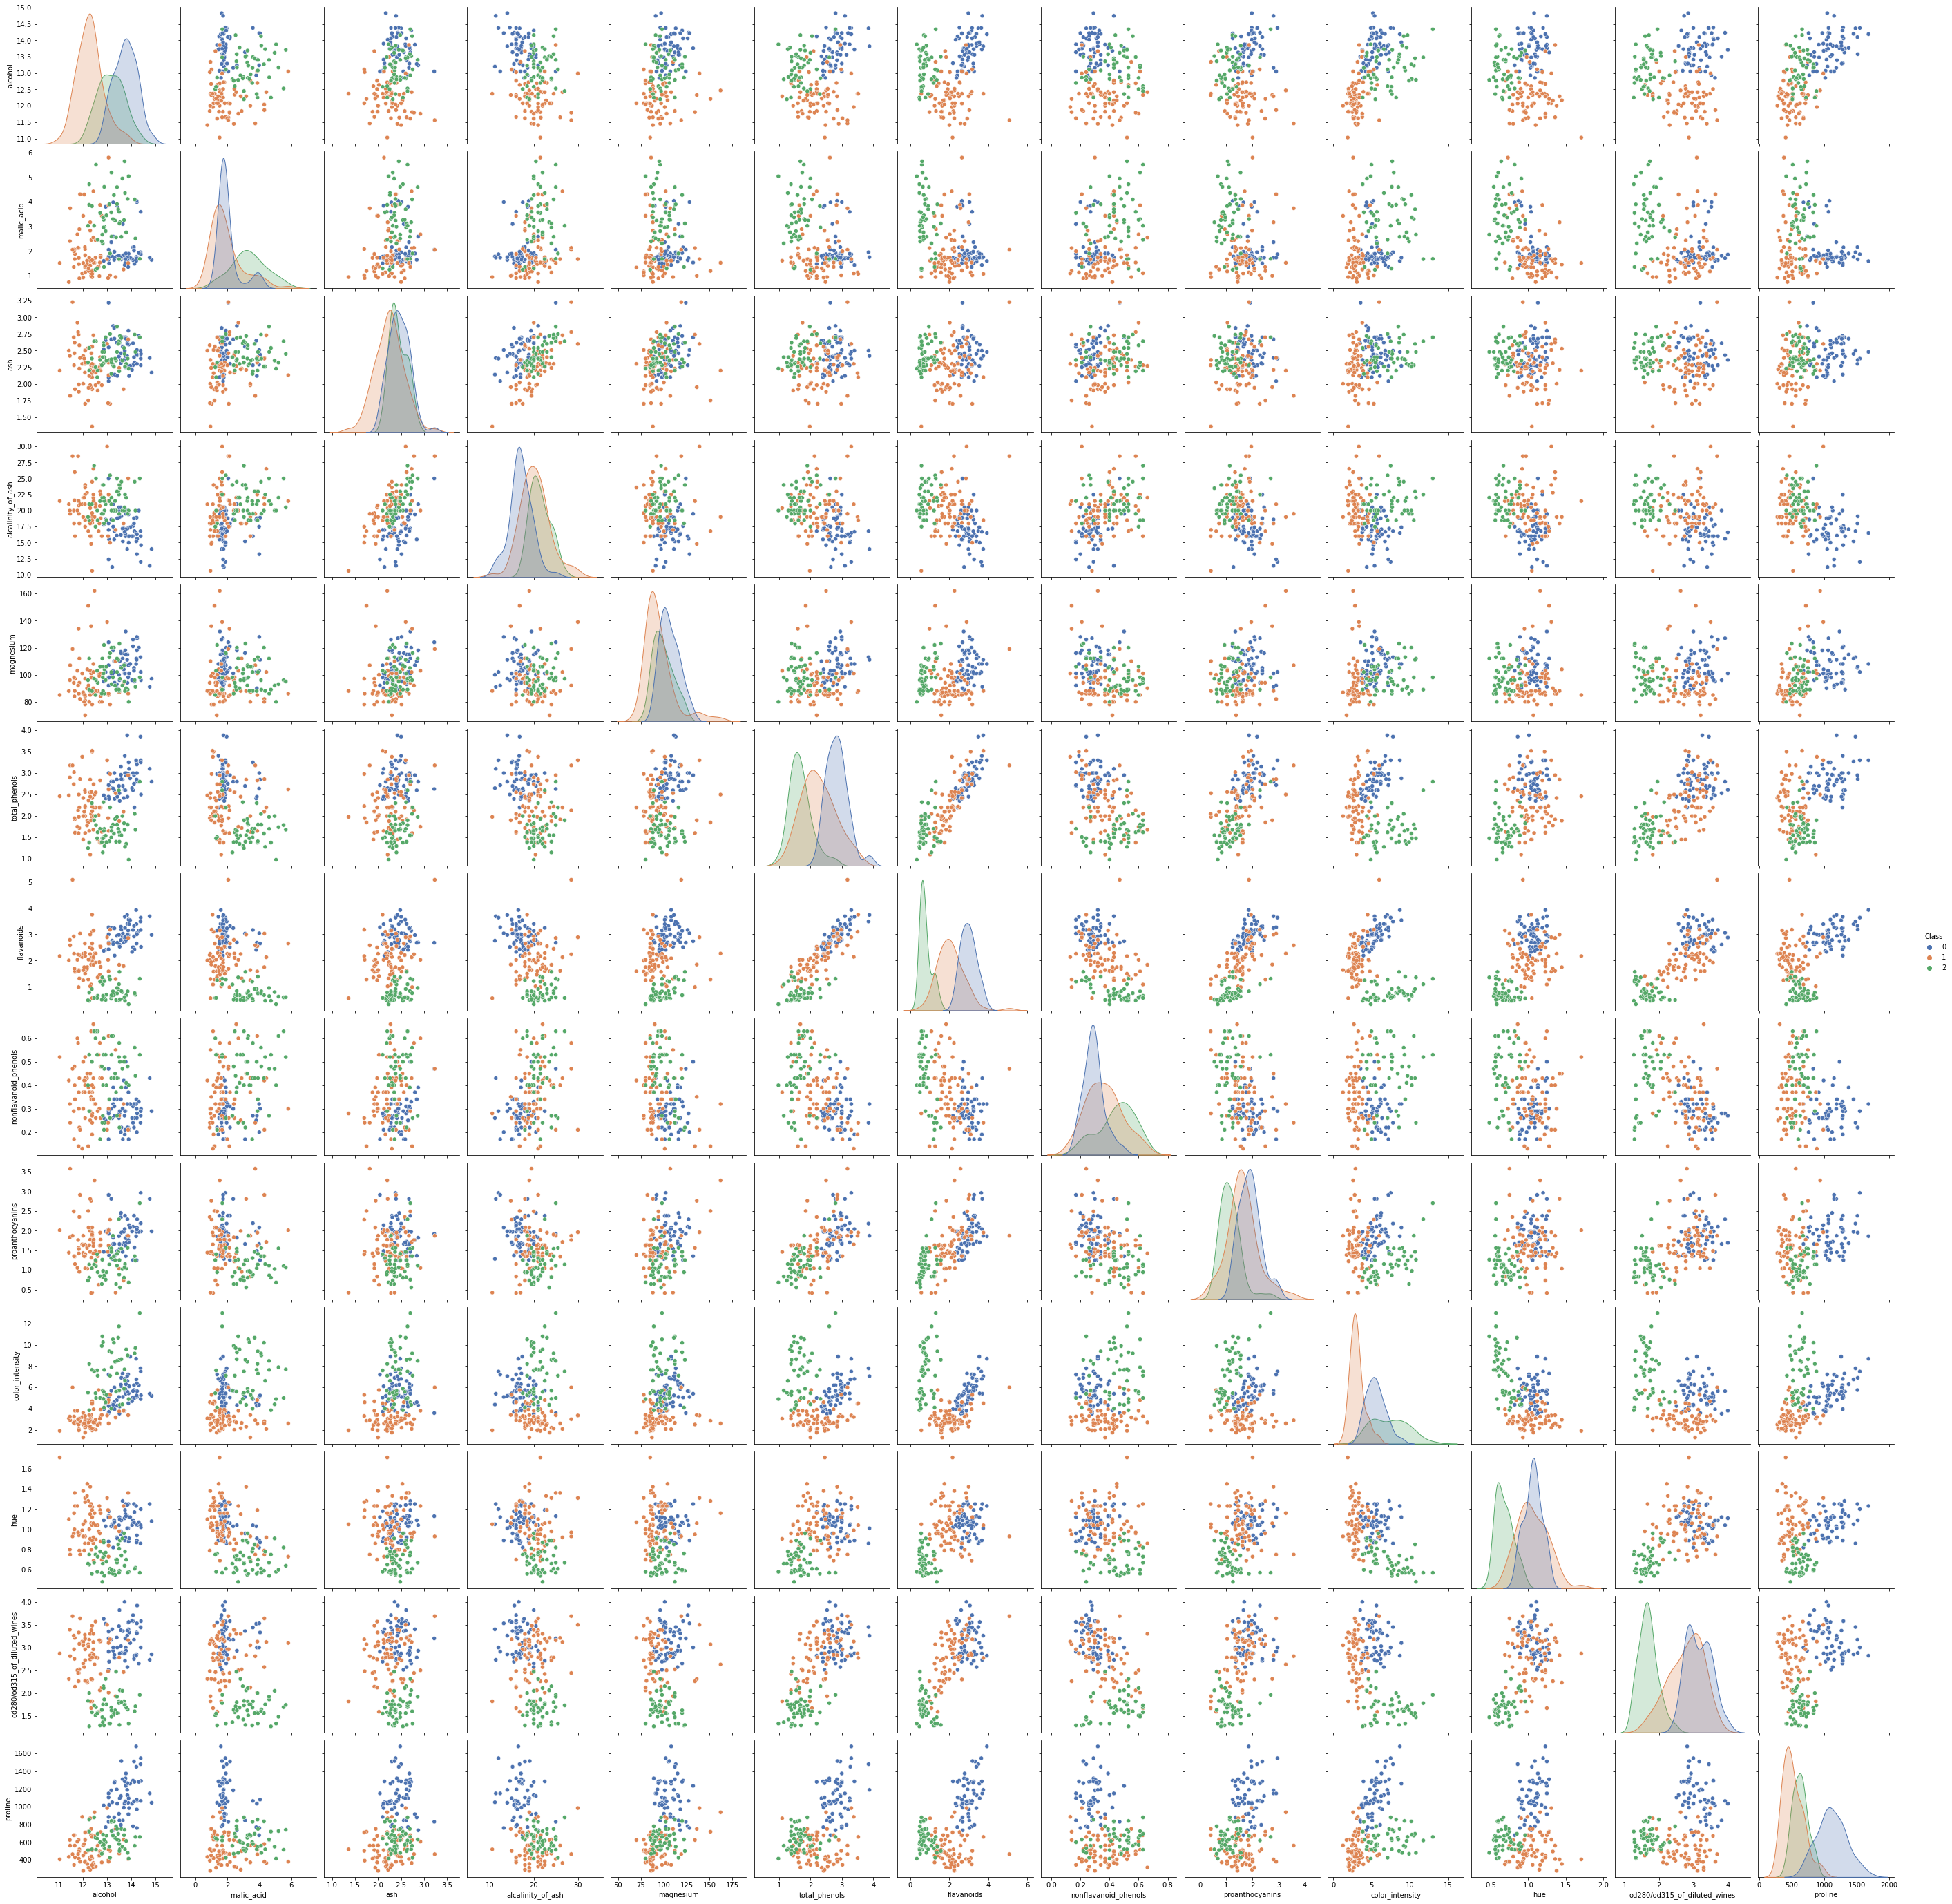

In [ ]:
import seaborn as sns


sns.pairplot(wine_pd, hue="Class",height=3, palette='deep')
plt.show()

## __Funciones útiles__

A continuación se presentan un grupo de funciones que será utilizada frecuentemente en la generación de los modelos

### __Visualizar límite de decisión__

In [ ]:
def make_meshgrid(X, y, step=.02):
    x = X.iloc[:,0]
    y = X.iloc[:,1]
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))
    return xx, yy

def plot_contours(ax, clf, X, y, **params):
    xx, yy = make_meshgrid(X, y)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.scatter(X.iloc[:,0], X.iloc[:,1], c=y.values, cmap=plt.cm.coolwarm, s=50, edgecolors='k')
    ax.set_ylabel(X.columns[1])
    ax.set_xlabel(X.columns[0])
    ax.set_title(clf.__class__.__name__)
    out = ax.contourf(xx, yy, Z, **params)
    return out

### __Visualizar matriz de confusión__

In [ ]:
from sklearn.metrics import plot_confusion_matrix

def confusion_matrix(clf, X, y):
  fig, ax = plt.subplots(figsize=(10,8))
  plt.rcParams.update({'font.size': 15})
  out = plot_confusion_matrix(clf, X, y, display_labels=['Clase 0', 'Clase 1', 'Clase 2'], cmap = plt.cm.Blues, ax=ax)
  plt.title("Matriz confusión")
  return out


### __Visualizar curva ROC en problemas multiclase__

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

def ROC(X, y, model):

  # split into train/test sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

  # fit model
  clf = OneVsRestClassifier(model)
  clf.fit(X_train, y_train)
  pred = clf.predict(X_test)
  pred_prob = clf.predict_proba(X_test)
  pred_prob = np.nan_to_num(pred_prob)

  # roc curve for classes
  fpr = {}
  tpr = {}
  thresh ={}

  n_class = 3

  for i in range(n_class):
      fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)

  # plotting
  fig, ax = plt.subplots(figsize=(10,8))
  ax.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Clase 0')
  ax.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Clase 1')
  ax.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Clase 2')
  ax.set_title(f'Multiclass ROC curve -  {model.__class__.__name__}')
  ax.set_xlabel('False Positive Rate')
  ax.set_ylabel('True Positive rate')
  ax.grid(True)

  return ax.legend(loc='best')



# __Generando Modelos (deben realizar y comparar mínimo tres)__

Usaremos únicamente dos características. Recordemos que para poderlo representar gráficamente, el número de características más la etiqueta o predicción, no pueden exceder de tres. Acá se presentan modelos paramétricos(regresión logística), probabilisticos (Naive Bayes) y no paramétricos (KNN, Arboles de decisión, SVM.

In [ ]:
wine_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  Class

Gracias a la matriz de correlación realizada, se deduce que los atributos que más influyen en la clase del vino son: malic_acid, alcalinity_of_ash, nonflavanoid_phenols y color_intensity

In [ ]:
X = wine_pd.iloc[:,:2] # aqui se seleccionan qué caracteristicas debe considerar el modelo. Asi como está, selecciona las dos primeras.
y = wine_pd['Class']
plots = []

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   alcohol     178 non-null    float64
 1   malic_acid  178 non-null    float64
dtypes: float64(2)
memory usage: 2.9 KB


## __Regresión logística__

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


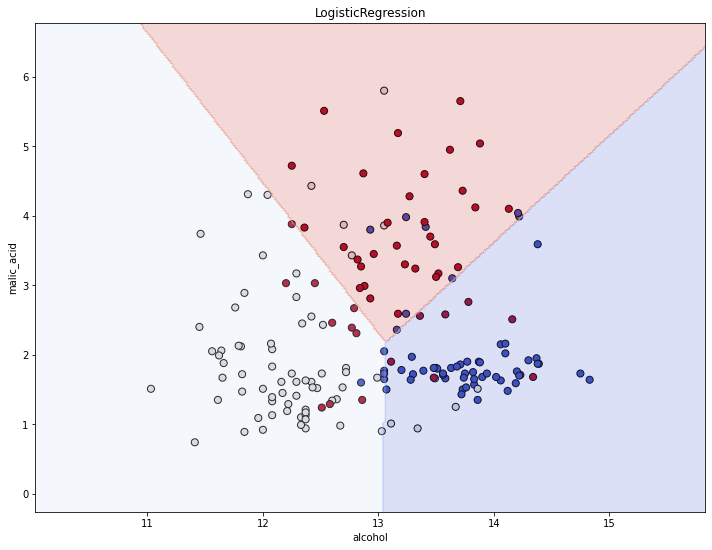

In [ ]:
from sklearn.linear_model import LogisticRegression


model = LogisticRegression()
clf = model.fit(X, y)
predicted = model.predict(X)

fig, ax = plt.subplots(figsize=(12,9))
ax1 = plot_contours(ax, model, X, y, cmap=plt.cm.coolwarm, alpha=0.2)
plots.append(ax)
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


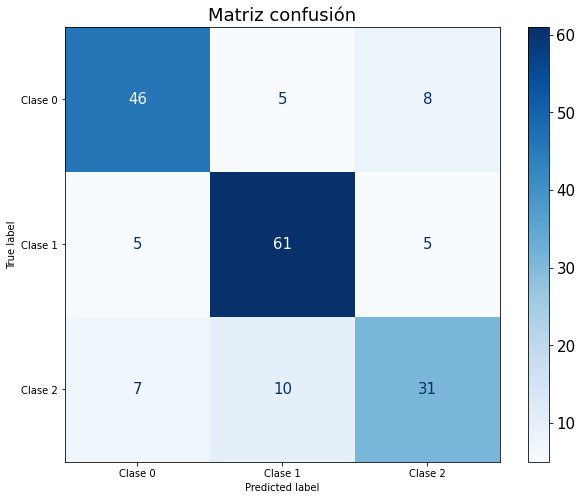

In [ ]:
confusion_matrix(model, X, y)
plt.show()

In [ ]:
from sklearn import metrics

print(metrics.classification_report(y, predicted))

              precision    recall  f1-score   support

           0       0.79      0.78      0.79        59
           1       0.80      0.86      0.83        71
           2       0.70      0.65      0.67        48

    accuracy                           0.78       178
   macro avg       0.77      0.76      0.76       178
weighted avg       0.77      0.78      0.77       178



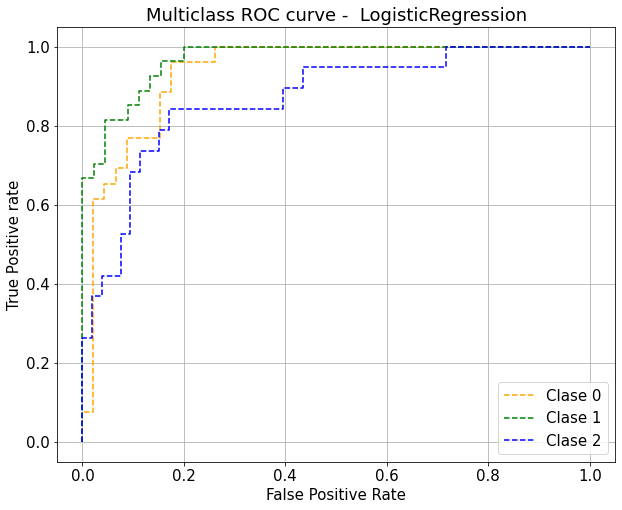

In [ ]:
ROC(X, y, model)
plt.show()

## __KNN__

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


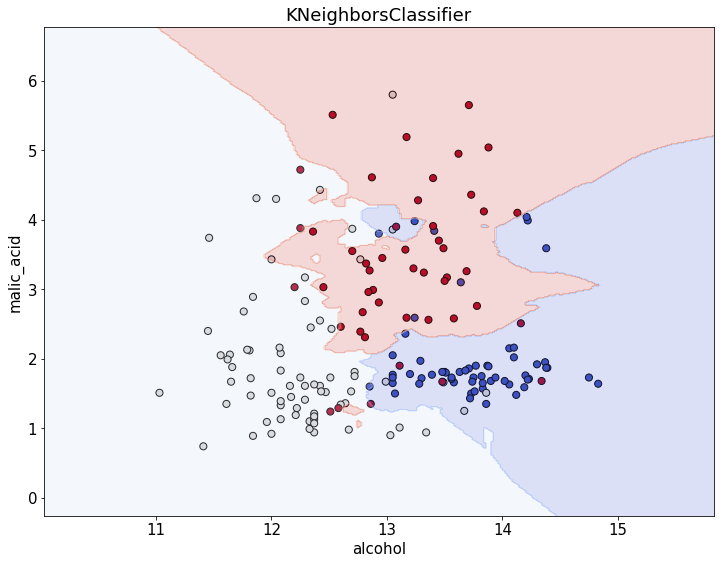

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


model = KNeighborsClassifier(n_neighbors=5)
clf = model.fit(X, y)
predicted = model.predict(X)

fig, ax = plt.subplots(figsize=(12,9))
ax = plot_contours(ax, model, X, y, cmap=plt.cm.coolwarm, alpha=0.2)
plots.append(ax)
plt.show()


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


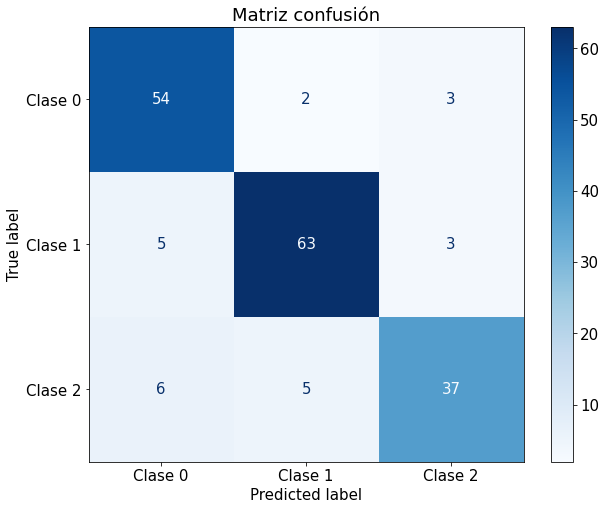

In [ ]:
confusion_matrix(model, X, y)
plt.show()

In [ ]:
from sklearn import metrics

print(metrics.classification_report(y, predicted))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87        59
           1       0.90      0.89      0.89        71
           2       0.86      0.77      0.81        48

    accuracy                           0.87       178
   macro avg       0.86      0.86      0.86       178
weighted avg       0.87      0.87      0.86       178



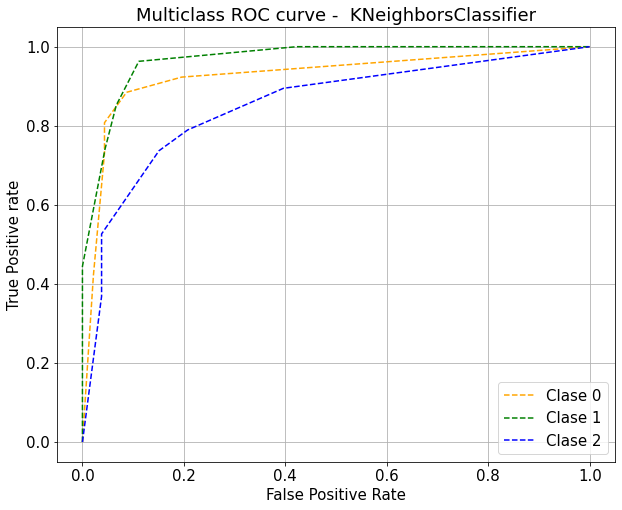

In [ ]:
ROC(X, y, model)
plt.show()

## __Bayes__

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  "X does not have valid feature names, but"


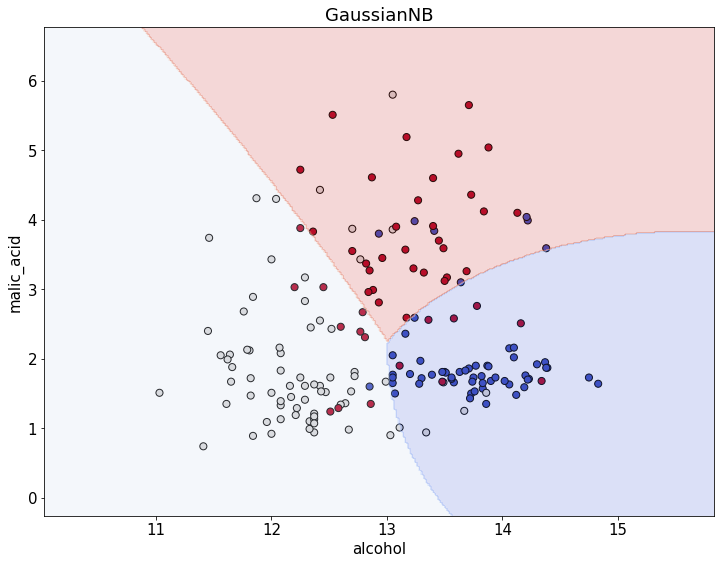

In [ ]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

clf = model.fit(X, y)
predicted = model.predict(X)

fig, ax = plt.subplots(figsize=(12,9))
ax = plot_contours(ax, model, X, y, cmap=plt.cm.coolwarm, alpha=0.2)
plots.append(ax)
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


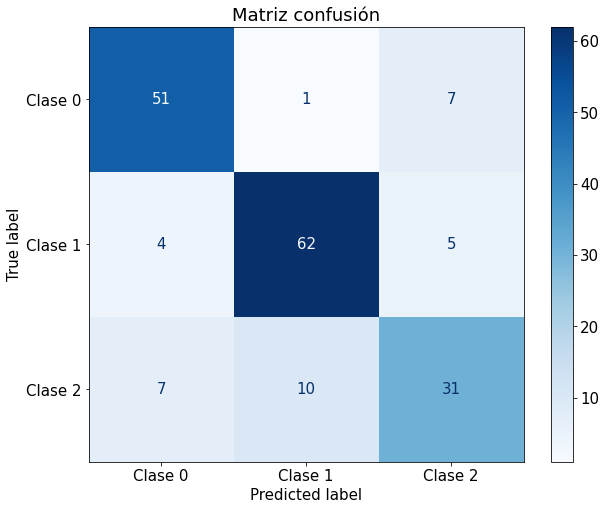

In [ ]:
confusion_matrix(model, X, y)
plt.show()

In [ ]:
from sklearn import metrics

print(metrics.classification_report(y, predicted))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84        59
           1       0.85      0.87      0.86        71
           2       0.72      0.65      0.68        48

    accuracy                           0.81       178
   macro avg       0.80      0.79      0.80       178
weighted avg       0.81      0.81      0.81       178



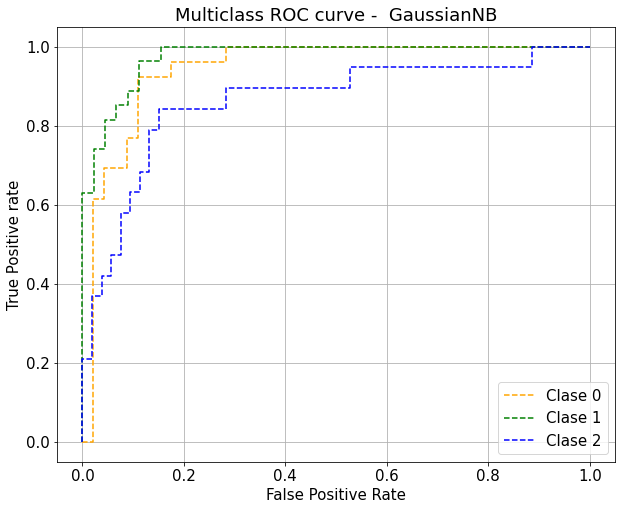

In [ ]:
ROC(X, y, model)
plt.show()

## __Árboles de decisión__

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


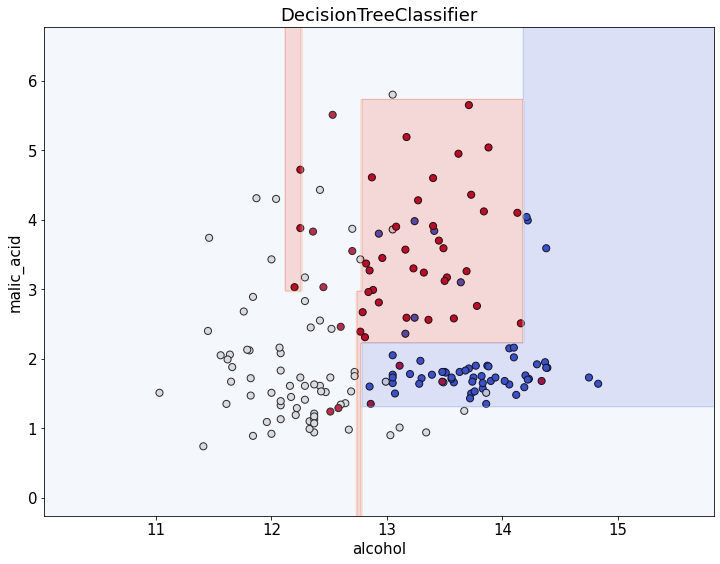

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

model = DecisionTreeClassifier(max_depth=4)

clf = model.fit(X, y)
predicted = model.predict(X)

fig, ax = plt.subplots(figsize=(12,9))
ax = plot_contours(ax, model, X, y, cmap=plt.cm.coolwarm, alpha=0.2)
plots.append(ax)
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


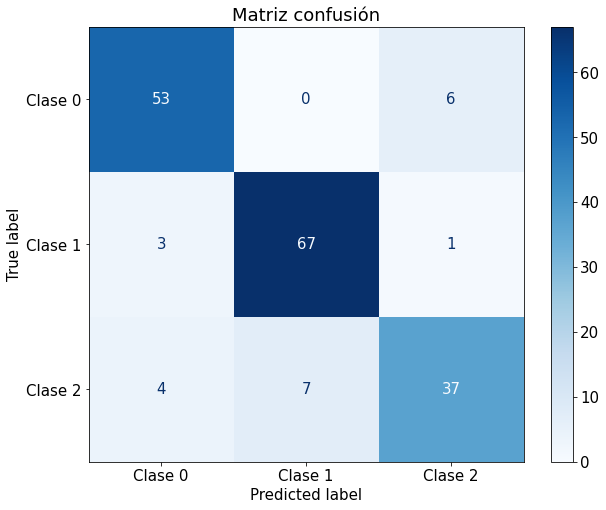

In [ ]:
confusion_matrix(model, X, y)
plt.show()

In [ ]:
from sklearn import metrics

print(metrics.classification_report(y, predicted))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        59
           1       0.91      0.94      0.92        71
           2       0.84      0.77      0.80        48

    accuracy                           0.88       178
   macro avg       0.88      0.87      0.87       178
weighted avg       0.88      0.88      0.88       178



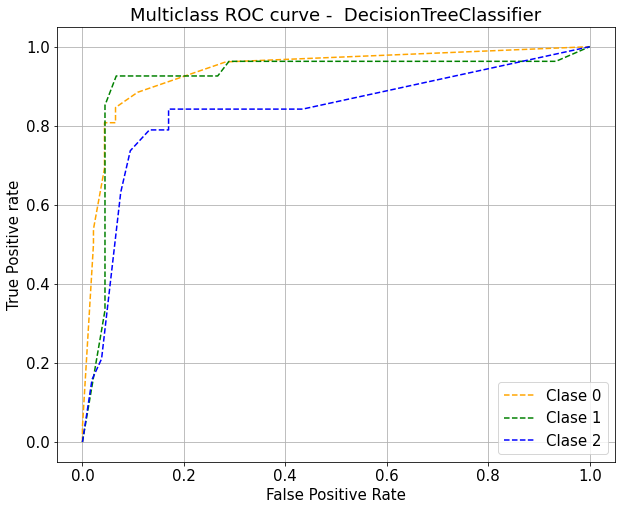

In [ ]:
ROC(X, y, model)
plt.show()

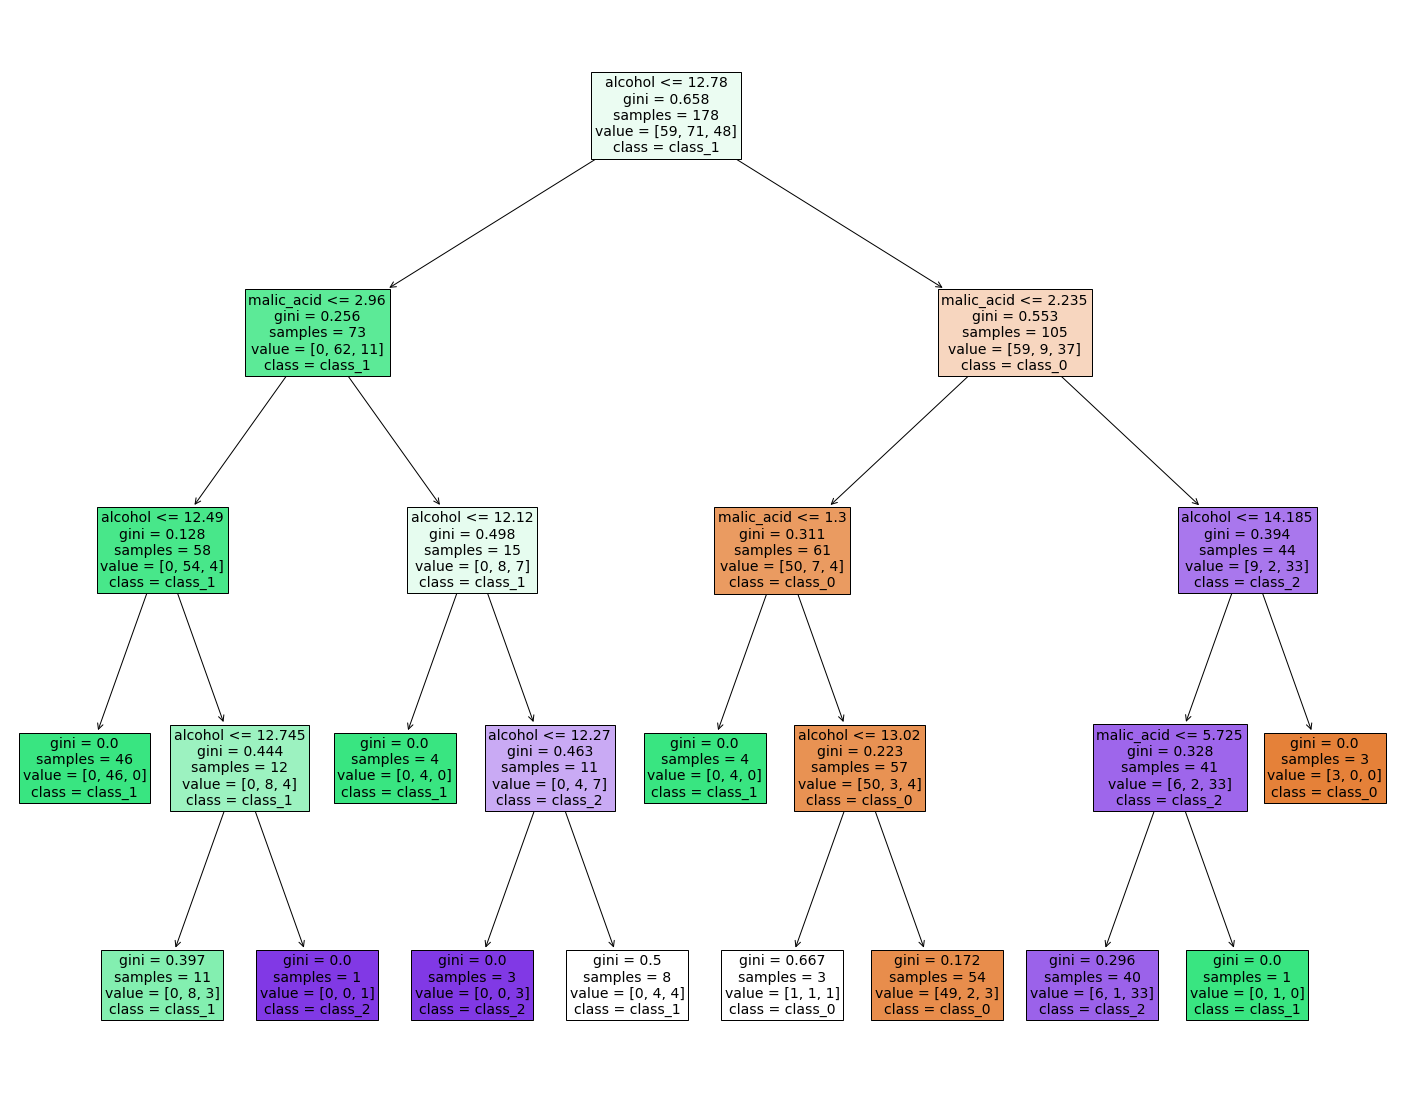

In [ ]:
fig = plt.figure(figsize=(25,20))
tree.plot_tree(model, feature_names=wine.feature_names, class_names=wine.target_names, filled=True)
plt.show()


## __SVM__

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


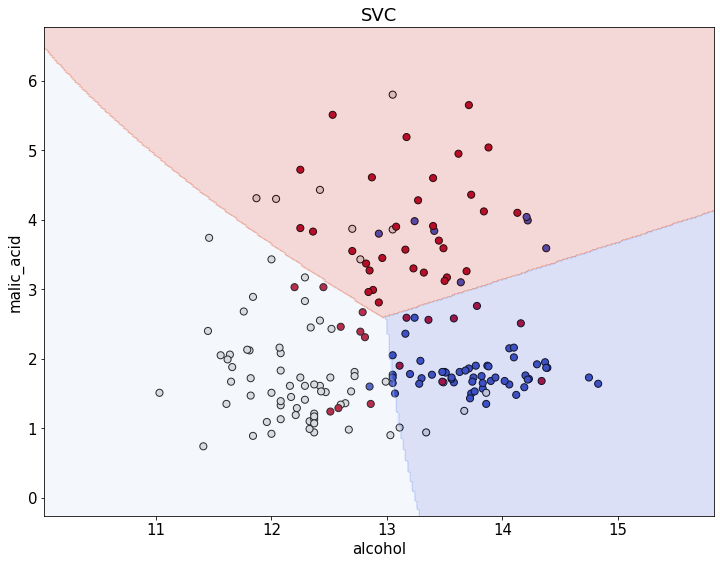

In [ ]:
from sklearn.svm import SVC

model = SVC(probability=True)
clf = model.fit(X, y)
predicted = model.predict(X)

fig, ax = plt.subplots(figsize=(12,9))
ax = plot_contours(ax, model, X, y, cmap=plt.cm.coolwarm, alpha=0.2)
plots.append(ax)
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


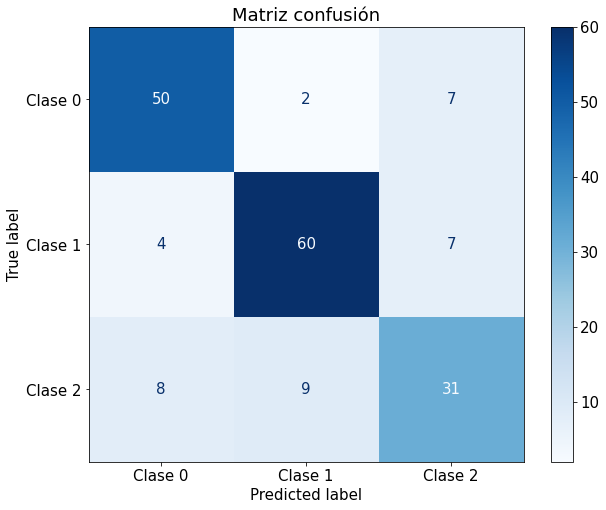

In [ ]:
confusion_matrix(model, X, y)
plt.show()

In [ ]:
from sklearn import metrics

print(metrics.classification_report(y, predicted))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83        59
           1       0.85      0.85      0.85        71
           2       0.69      0.65      0.67        48

    accuracy                           0.79       178
   macro avg       0.78      0.78      0.78       178
weighted avg       0.79      0.79      0.79       178



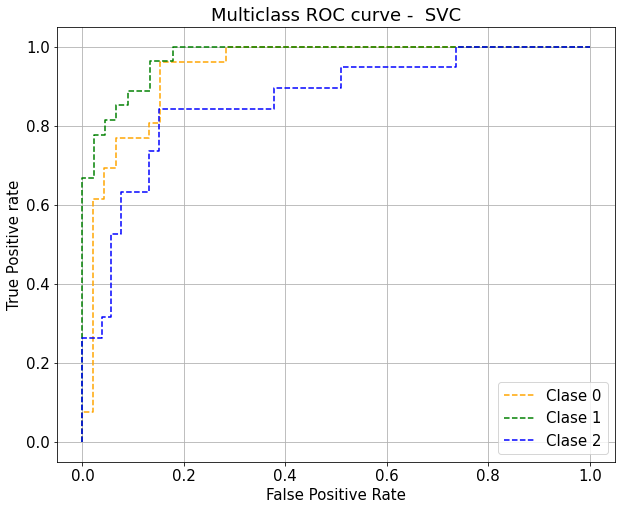

In [ ]:
ROC(X, y, model)
plt.show()

##  __Visualizando todos los modelos__

In [ ]:

rl = LogisticRegression(max_iter=5000).fit(X, y)
knn = KNeighborsClassifier(n_neighbors=5).fit(X, y)
bayes = GaussianNB().fit(X, y)
tree = DecisionTreeClassifier(max_depth=4).fit(X, y)
svm = SVC(probability=True).fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have val

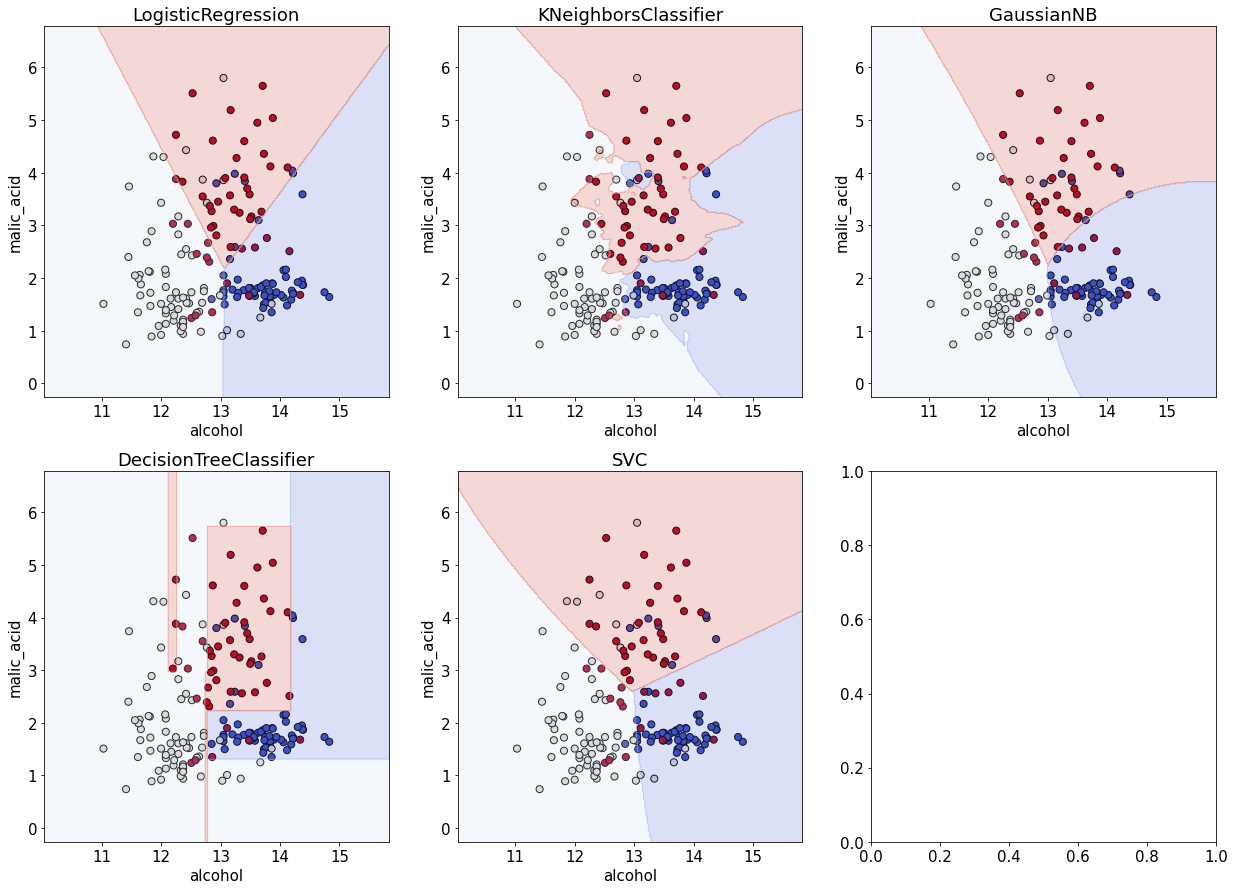

In [ ]:
rows = 2
columns = 2
fig, axes = plt.subplots(2,3, figsize=(21, 15))
clf = [rl, knn, bayes, tree, svm]

plot_contours(axes[0][0], rl, X, y, cmap=plt.cm.coolwarm, alpha=0.2)
plot_contours(axes[0][1], knn, X, y, cmap=plt.cm.coolwarm, alpha=0.2)
plot_contours(axes[0][2], bayes, X, y, cmap=plt.cm.coolwarm, alpha=0.2)
plot_contours(axes[1][0], tree, X, y, cmap=plt.cm.coolwarm, alpha=0.2)
plot_contours(axes[1][1], svm, X, y, cmap=plt.cm.coolwarm, alpha=0.2)
plt.show()

# __Validación Cruzada - K-folds__

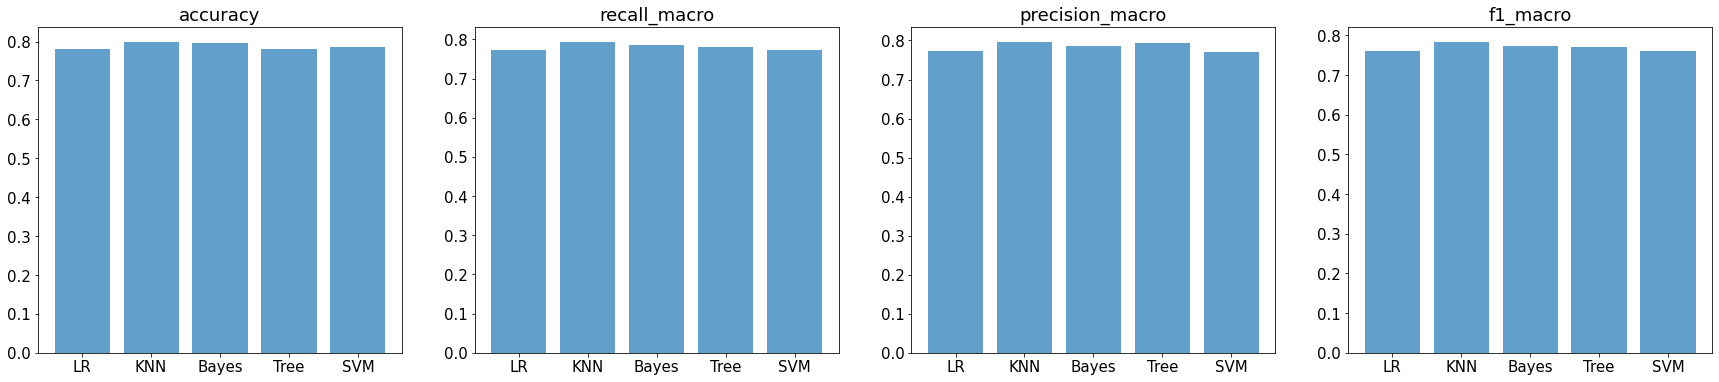

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score


scores = ['accuracy','recall_macro','precision_macro','f1_macro']

fig, axes = plt.subplots(1, 4, figsize=(30,6))
for i, score in enumerate(scores):
  performance = []
  for model in clf:

    kf = KFold(10, shuffle=True, random_state=1)
    score_result = cross_val_score(model, X, y, scoring=score, cv=kf)
    performance.append(score_result.mean())

  axes[i].bar(['LR', 'KNN', 'Bayes', 'Tree', 'SVM' ], performance, alpha=0.7)
  axes[i].set_title(score)
  #axes[i].grid()
plt.show()


# De acuerdo con lo anterior:

Qué modelo funciona mejor para el problema elegido?

Con sus propias palabras, explique las razones de su elección.

En nuestra opinión, creemos que el mejor modelo para este ejercicio es KNeighborsClassifier ya que tiene mejores valoraciones que los otros modelos en las metricas de clasificación. Ademas, en la grafica es el metodo de clasificación que abarca de mejor manera el area segun los datos.